In [ ]:
%load_ext autoreload
%autoreload 2

from msr.training.data.datasets import MimicDataset
from msr.training.data.datamodules import MimicDataModule

TARGET = "sbp_dbp_avg"
SPLITS = ["train", "val", "test"]

---
# **Whole signal**

**`whole_signal_waveforms`**

No info file for that split
No info file for that split
No info file for that split


MimicDataModule (whole_signal_waveforms)
  info       = {}

  Train MimicDataset:
    data_shape            = torch.Size([14559, 7500, 2])

  Val MimicDataset:
    data_shape            = torch.Size([3130, 7500, 2])

  Test MimicDataset:
    data_shape            = torch.Size([3153, 7500, 2])


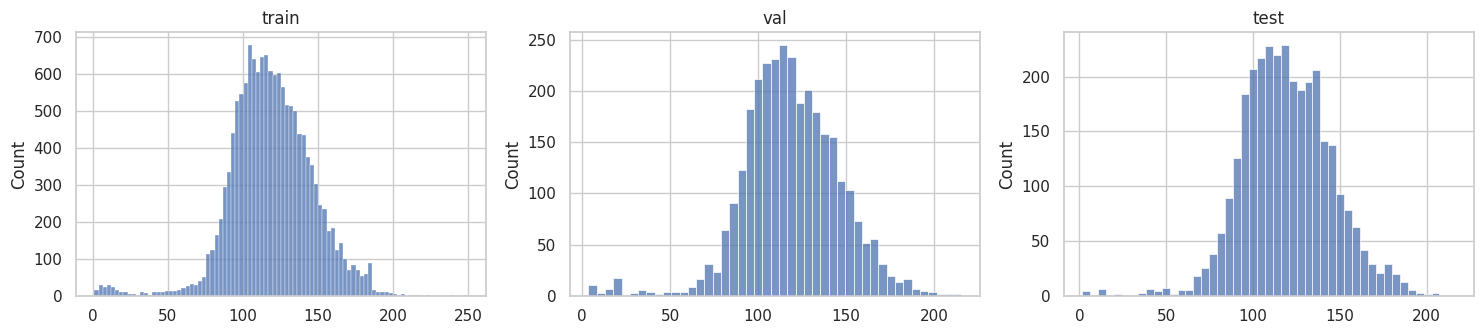

In [ ]:
dm = MimicDataModule("whole_signal_waveforms", target="sbp_dbp_avg")
dm.setup(); dm.plot_targets(); print(dm.describe(ds_fields=['data_shape'], dm_fields=['info']))

**`whole_signal_features`**

In [3]:
dm = MimicDataModule("whole_signal_features")
dm.setup(); print(dm.describe(ds_fields=['data_shape'], dm_fields=[]))

No info file for that split
No info file for that split
No info file for that split


MimicDataModule (whole_signal_features)
  
  Train MimicDataset:
    data_shape            = torch.Size([14559, 693])

  Val MimicDataset:
    data_shape            = torch.Size([3130, 693])

  Test MimicDataset:
    data_shape            = torch.Size([3153, 693])


---
# **Windows**

**`windows_waveforms`**

In [23]:
dm = MimicDataModule("windows_waveforms")
dm.setup(); print(dm.describe(ds_fields=['data_shape'], dm_fields=[]))

No info file for that split
No info file for that split
No info file for that split


MimicDataModule (windows_waveforms)
  
  Train MimicDataset:
    data_shape            = torch.Size([14559, 3, 2500, 2])

  Val MimicDataset:
    data_shape            = torch.Size([3130, 3, 2500, 2])

  Test MimicDataset:
    data_shape            = torch.Size([3153, 3, 2500, 2])


**`windows_features`**

In [24]:
dm = MimicDataModule("windows_features")
dm.setup(); print(dm.describe(ds_fields=['data_shape'], dm_fields=[]))

No info file for that split
No info file for that split
No info file for that split


MimicDataModule (windows_features)
  
  Train MimicDataset:
    data_shape            = torch.Size([14559, 3, 81])

  Val MimicDataset:
    data_shape            = torch.Size([3130, 3, 81])

  Test MimicDataset:
    data_shape            = torch.Size([3153, 3, 81])


---
# **Beats**

**`beats_waveforms`**

In [25]:
dm = MimicDataModule("beats_waveforms")
dm.setup(); print(dm.describe(ds_fields=['data_shape'], dm_fields=[]))

No info file for that split
No info file for that split
No info file for that split


MimicDataModule (beats_waveforms)
  
  Train MimicDataset:
    data_shape            = torch.Size([14559, 120, 100, 2])

  Val MimicDataset:
    data_shape            = torch.Size([3130, 120, 100, 2])

  Test MimicDataset:
    data_shape            = torch.Size([3153, 120, 100, 2])


**`beats_features`**

In [26]:
dm = MimicDataModule("beats_features")
dm.setup(); print(dm.describe(ds_fields=['data_shape'], dm_fields=[]))

No info file for that split
No info file for that split
No info file for that split


MimicDataModule (beats_features)
  
  Train MimicDataset:
    data_shape            = torch.Size([14559, 120, 66])

  Val MimicDataset:
    data_shape            = torch.Size([3130, 120, 66])

  Test MimicDataset:
    data_shape            = torch.Size([3153, 120, 66])


---
# **Aggregated beat**

**`agg_beat_waveforms`**

In [67]:
dm = MimicDataModule("agg_beat_waveforms")
dm.setup(); print(dm.describe(ds_fields=['data_shape'], dm_fields=[]))

No info file for that split
No info file for that split
No info file for that split


MimicDataModule (agg_beat_waveforms)
  
  Train MimicDataset:
    data_shape            = torch.Size([14559, 100, 2])

  Val MimicDataset:
    data_shape            = torch.Size([3130, 100, 2])

  Test MimicDataset:
    data_shape            = torch.Size([3153, 100, 2])


**`agg_beat_features`**

In [9]:
dm = MimicDataModule("agg_beat_features", bp_targets=["sbp"])
dm.setup(); print(dm.describe(ds_fields=['data_shape'], dm_fields=[]))

No info file for that split
No info file for that split
No info file for that split


MimicDataModule (agg_beat_features)
  
  Train MimicDataset:
    data_shape            = torch.Size([14559, 122])

  Val MimicDataset:
    data_shape            = torch.Size([3130, 122])

  Test MimicDataset:
    data_shape            = torch.Size([3153, 122])


---